In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('/content/politifact_real.csv')

In [7]:
df.head(2)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   person_count  4 non-null      int64
 1   org_count     4 non-null      int64
 2   gpe_count     4 non-null      int64
 3   popularity    4 non-null      int64
 4   authenticity  4 non-null      int64
dtypes: int64(5)
memory usage: 288.0 bytes


In [41]:
df.describe()

,person_count,org_count,gpe_count,popularity,authenticity
count,4.000000,4.000000,4.000000,4.000000,4.00000
mean,2.000000,1.500000,1.750000,137.500000,0.50000
std,2.160247,1.290994,1.707825,76.757193,0.57735
min,0.000000,0.000000,0.000000,80.000000,0.00000
25%,0.750000,0.750000,0.750000,95.000000,0.00000
50%,1.500000,1.500000,1.500000,110.000000,0.50000
75%,2.750000,2.250000,2.500000,152.500000,1.00000
max,5.000000,3.000000,4.000000,250.000000,1.00000


In [42]:
df.shape

(4, 5)

In [44]:
fake_news_politifact = pd.read_csv("/content/politifact_fake.csv")
real_news_politifact = pd.read_csv("/content/politifact_real.csv")
fake_news_gossipcop = pd.read_csv("/content/gossipcop_fake.csv")
real_news_gossipcop = pd.read_csv("/content/gossipcop_real.csv")



In [45]:
# Combining all datasets into a single DataFrame
fake_news = pd.concat([fake_news_politifact, fake_news_gossipcop])
real_news = pd.concat([real_news_politifact, real_news_gossipcop])

In [46]:
fake_news["label"] = "fake"
real_news["label"] = "real"

In [47]:
news_data = pd.concat([fake_news, real_news])

In [48]:
news_data.shape

(23196, 5)

In [50]:
print(news_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 23196 entries, 0 to 16816
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         23196 non-null  object
 1   news_url   22866 non-null  object
 2   title      23196 non-null  object
 3   tweet_ids  21695 non-null  object
 4   label      23196 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB
None


In [52]:
news_data.head()

,id,news_url,title,tweet_ids,label
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,fake
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,fake
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,fake
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,fake
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,fake


In [53]:
news_data = news_data.dropna()

In [9]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [54]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [55]:
def extract_entities(text):
    doc = nlp(text)
    entities = {"PERSON": 0, "ORG": 0, "GPE": 0}
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_] += 1
    return entities

In [56]:
news_data["entities"] = news_data["title"].apply(extract_entities)

In [57]:
news_data["person_count"] = news_data["entities"].apply(lambda x: x["PERSON"])
news_data["org_count"] = news_data["entities"].apply(lambda x: x["ORG"])
news_data["gpe_count"] = news_data["entities"].apply(lambda x: x["GPE"])

In [58]:
# Add word count
news_data["word_count"] = news_data["title"].apply(lambda x: len(x.split()))

In [59]:
# Add features for engagement metrics (fake sample: tweet_id count)
news_data["tweet_count"] = news_data["tweet_ids"].apply(lambda x: len(str(x).split("\t")))

In [60]:
# Drop unnecessary columns
news_data = news_data.drop(columns=["entities", "tweet_ids"])

In [61]:
news_data.head(3)

,id,news_url,title,label,person_count,org_count,gpe_count,word_count,tweet_count
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,fake,0,0,0,9,163
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,fake,0,0,0,9,102
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,fake,2,0,0,12,220


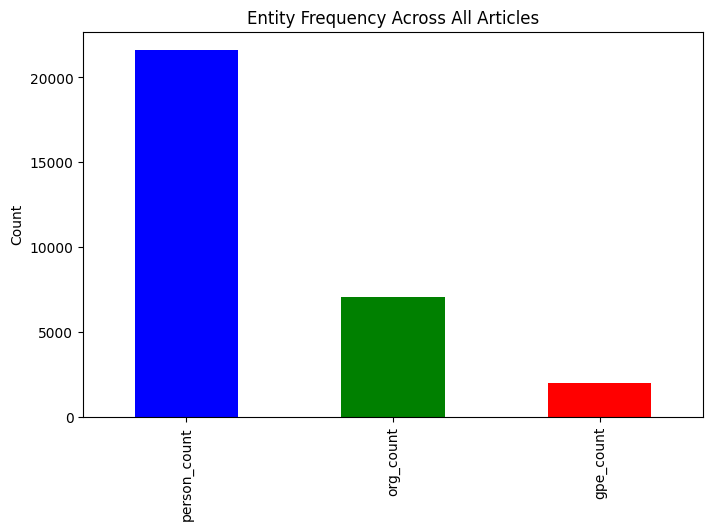

In [62]:
entity_counts = news_data[["person_count", "org_count", "gpe_count"]].sum()
entity_counts.plot(kind="bar", color=["blue", "green", "red"], figsize=(8, 5))
plt.title("Entity Frequency Across All Articles")
plt.ylabel("Count")
plt.show()


In [63]:
correlation = news_data[["word_count", "tweet_count", "person_count", "org_count", "gpe_count"]].corr()

In [64]:
correlation

,word_count,tweet_count,person_count,org_count,gpe_count
word_count,1.000000,-0.103478,0.214638,0.114072,0.067167
tweet_count,-0.103478,1.000000,-0.049583,0.016015,-0.004539
person_count,0.214638,-0.049583,1.000000,-0.220702,-0.026993
org_count,0.114072,0.016015,-0.220702,1.000000,-0.014143
gpe_count,0.067167,-0.004539,-0.026993,-0.014143,1.000000


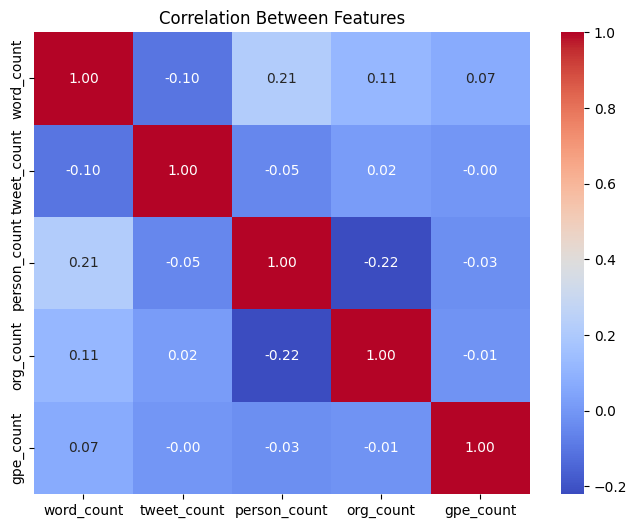

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [10]:
import spacy

In [67]:
X = news_data[["word_count", "tweet_count", "person_count", "org_count", "gpe_count"]]
y = news_data["label"].apply(lambda x: 1 if x == "real" else 0)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1047
           1       0.84      0.89      0.86      3235

    accuracy                           0.79      4282
   macro avg       0.71      0.69      0.70      4282
weighted avg       0.78      0.79      0.78      4282



In [71]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({1: 12885, 0: 12885})


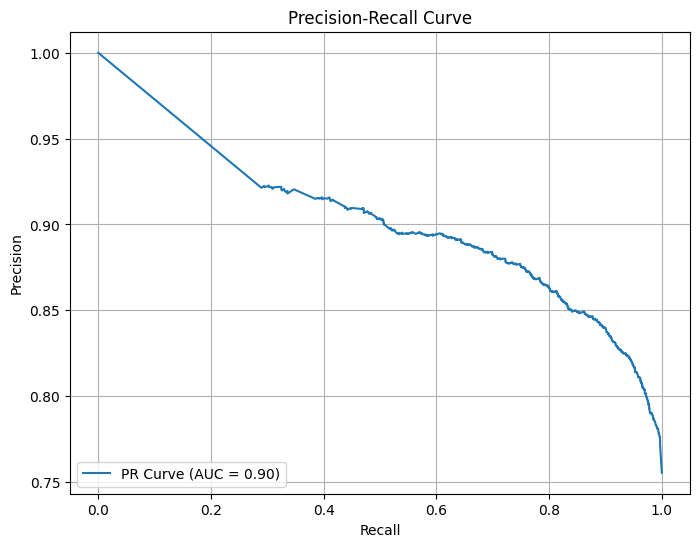

In [72]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()


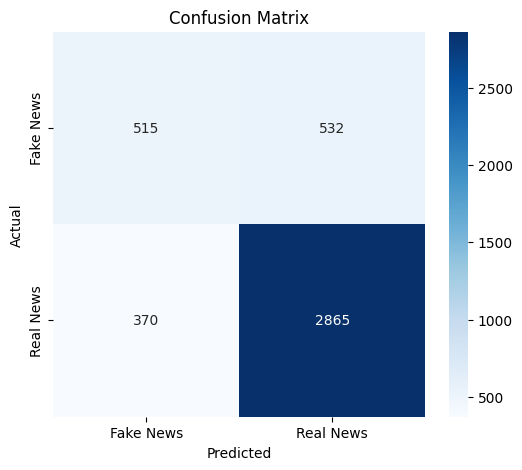

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake News", "Real News"], yticklabels=["Fake News", "Real News"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [74]:
# Adjust the threshold
threshold = 0.4
y_pred_adjusted = (y_scores >= threshold).astype(int)

# Evaluate performance with the adjusted threshold
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.62      0.42      0.50      1047
           1       0.83      0.92      0.87      3235

    accuracy                           0.80      4282
   macro avg       0.73      0.67      0.69      4282
weighted avg       0.78      0.80      0.78      4282



In [76]:
news_data.head()

,id,news_url,title,label,person_count,org_count,gpe_count,word_count,tweet_count
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,fake,0,0,0,9,163
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,fake,0,0,0,9,102
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,fake,2,0,0,12,220
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,fake,1,0,0,6,22
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,fake,0,1,0,8,550


In [78]:
# Example: Correlation heatmap
entity_features = ["org_count", "person_count", "gpe_count", "word_count", "tweet_count"]
correlations = df[entity_features + ["popularity"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


KeyError: "['word_count', 'tweet_count'] not in index"